# 5. Locally weighted linear regression
<b>(a)</b> [10 points] Consider a linear regression problem in which we want to "weight" different training examples differently. Specifically, suppose we want to minimize
$$J(\theta) = \frac{1}{2}\sum_{i=1}^m\omega^{(i)}\left(\theta^Tx^{(i)}-y^{(i)}\right)^2.$$
In class, we worked out what happens for the case where all the weights (the $\omega^{(i)}$'s) are the
same. In this problem, we will generalize some of those ideas to the weighted setting.

1. [2 points] Show that $J(\theta)$ can also be written
$$J(\theta) =\frac{1}{2} \big(X\theta - y\big)^TW\big(X\theta - y\big)$$
for an appropriate matrix $W$ , and where $X$ and $y$ are as defined in class. Clearly specify
the value of each element of the matrix $W$ .


2. [4 points] If all the $\omega^{(i)}$'s equal $1$, then we saw in class that the normal equation is
$X^TX\theta = X^Ty$,
and that the value of θ that minimizes $J(\theta)$ is given by $\theta = (X^TX)^{-1}X^Ty$. By finding the derivative $\nabla_{\theta}J(\theta)$ and setting that to zero, generalize the normal equation to this weighted setting, and give the new value of $\theta$ that minimizes $J(\theta)$ in closed form as a function of $X$, $W$ and $y$.


3. [4 points] Suppose we have a dataset $\{(x^{(i)}, y^{(i)}); i = 1,\ldots,m\}$ of $m$ independent examples, but we model the $y^{(i)}$’s as drawn from conditional distributions with different levels of variance $(\sigma^{(i)})^2$. Specifically, assume the model 
$$p(y(i)|x(i);\theta)= \frac{1}{\sqrt{2\pi}\sigma^{(i)}}\exp\left(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}\right)$$
That is, each $y^{(i)}$ is drawn from a Gaussian distribution with mean $\theta x^{(i)}$ and variance $(\sigma^{(i)})^2$ (where the $(\sigma^{(i)})^2$’s are fixed, known, constants). Show that finding the maximum likelihood estimate of $\theta$ reduces to solving a weighted linear regression problem. State clearly what the $\omega^{(i)}$'s are in terms of the $\sigma^{(i)}$'s.

### Answer: 

1. Assume that $\theta$ is a vector of length $n$ and $X$ is an $m$ by $n$ matrix. Set $W$ to be an $m$ by $m$ diagonal matrix whre $W_{ii} = \omega^{(i)}$. Now, the desired formula for $J(\theta)$ cen be verified by just matrix multliplication.


2. Taking the derivative $\nabla_{\theta}J(\theta)$ and setting that to zero, we have
\begin{align*}
\nabla_\theta(J(\theta))
& = X^TW\big(X\theta - y\big)\\
& = 0
\end{align*}
which results in 
\begin{align*}\theta = (X^TWX)^{-1}X^TWy.\end{align*}
    
3. Lets fisrt compute the  likelihood  of $\theta$:
\begin{align*}    
L(\theta)
    & =  \prod_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma^{(i)}}\exp\left(-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}\right),
\end{align*}
which clearly indicates the *negative log-likelihood* $l(\theta)$ is the following.
\begin{align*}    
l(\theta)
    & =  C + \sum_{i=1}^m\left(\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}\right)\\
    & = C  + \frac{1}{2}\big(X\theta - y\big)^TW\big(X\theta - y\big)
\end{align*}
whre $W$ is an $m$ by $m$ diagonal matrix whose $i$-th element in its diagonal is $(\sigma^{(i)})^2$.
Using previous part conclusion, since maximizing the likelihood is equvalent to minimizing $l(\theta)$, we obtain  
\begin{align*}\theta = (X^TWX)^{-1}X^TWy.\end{align*}

<b>(b)</b> [10 points] <b>Coding problem.</b> We will now consider the following dataset (the formatting
matches that of Datasets 1-4, except $x^{(i)}$ is $1$-dimensional): 

`data/ds5_{train,valid,test}.csv`

In `src/p05b_lwr.py`, implement locally weighted linear regression using the normal equations you derived in Part (a) and using
    $$\omega^{(i)} = \exp\left(-\frac{\left\|x^{(i)}-x\right\|_2^2}{2\tau^2}\right).$$
Train your model on the train split using $\tau= 0.5$, then run your model on the valid split and report the mean squared error (MSE). Finally plot your model’s predictions on the validation set (plot the training set with blue ‘x’ markers and the validation set with a red ‘o’ markers). Does the model seem to be under- or overfitting?

In [1]:
import numpy as np
import src.util as util
from src.linear_model import LinearModel

import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [2]:
train_path = 'data/ds5_train.csv'
valid_path = 'data/ds5_valid.csv'
test_path = 'data/ds5_test.csv'



# data sets ready for use in logistic regression 
x_train, y_train = util.load_dataset(train_path,  add_intercept=True)
x_valid, y_valid = util.load_dataset(valid_path,  add_intercept=True)
x_test, y_test = util.load_dataset(test_path, add_intercept=True)

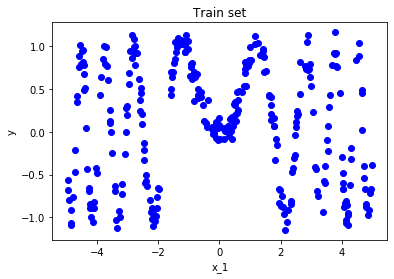

In [6]:
plt.xlabel('x_1')
plt.ylabel('y')
plt.title ('Train set')
plt.plot(x_train[:, -1], y_train, 'bo')
plt.show()

In [7]:
class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        m,n = x.shape
        y_pred = np.zeros(m)
        for i in range(m):
            W_i = np.exp(-np.sum((self.x - x[i])**2, axis = 1)/(2*self.tau**2))
            theta = np.linalg.inv((self.x.T * W_i)@self.x) @ (self.x.T * W_i) @ self.y
            y_pred[i] = theta.T@x[i]
        return y_pred
        # *** END CODE HERE ***

In [8]:
clf = LocallyWeightedLinearRegression(tau=0.5)
clf.fit(x_train, y_train)

In [9]:
y_train_pred = clf.predict(x_train)
y_valid_pred = clf.predict(x_valid)

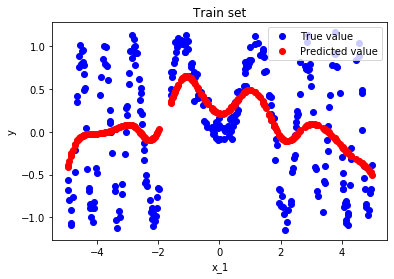

MSE is:  0.32535235950212116


In [10]:
plt.xlabel('x_1')
plt.ylabel('y')
plt.title ('Train set')
plt.plot(x_train[:, -1], y_train, 'bo', label = 'True value')
plt.plot(x_train[:, -1], y_train_pred, 'ro', label = 'Predicted value')
plt.legend(loc='upper right')
plt.show()
print("MSE is: ", np.mean((y_train-y_train_pred)**2))

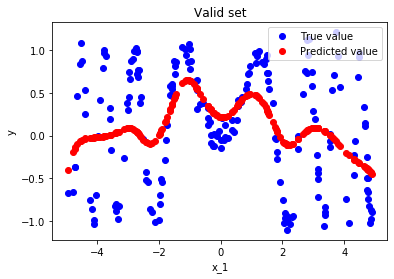

MSE is:  0.3305312682137523


In [11]:
plt.xlabel('x_1')
plt.ylabel('y')
plt.title ('Valid set')
plt.plot(x_valid[:, -1], y_valid, 'bo', label = 'True value')
plt.plot(x_valid[:, -1], y_valid_pred, 'ro', label = 'Predicted value')
plt.legend(loc='upper right')
plt.show()
print("MSE is: ", np.mean((y_valid-y_valid_pred)**2))

<b>(c)</b> [5 points] <b>Coding problem.</b> We will now tune the hyperparameter $\tau$ . In `src/p05c_tau.py`, find the MSE value of your model on the validation set for each of the values of $\tau$ specified in the code. For each $\tau$, plot your model’s predictions on the validation set in the format described in part (b). Report the value of $\tau$ which achieves the lowest MSE on the valid split, and finally report the MSE on the test split using this $\tau$-value.
    
### <font color=red> Answer:</font>

In [55]:
def plot(x, y, y_p, tau, Type = 'Validation'):
    plt.xlabel('x_1')
    plt.ylabel('y')
    plt.title (Type + ' set, tau = %s' %tau)
    plt.plot(x, y, 'bo', label = 'True value')
    plt.plot(x, y_p, 'ro', label = 'Predicted value')
    plt.legend(loc='upper right')
    plt.show()
    print("MSE for " +Type+ " set: ", np.mean((y-y_p)**2))

In [63]:
def main(tau_list):
    """Problem 5(b): Tune the bandwidth paramater tau for LWR.

    Args:
        tau_values: List of tau values to try.
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """

    # *** START CODE HERE ***
    # Search tau_values for the best tau (lowest MSE on the validation set)
    # Fit a LWR model with the best tau value
    # Run on the test set to get the MSE value
    # Save predictions to pred_path
    # Plot data
    min_error = np.inf
    best_tau = None
    for tau in tau_list:
        clf = LocallyWeightedLinearRegression(tau = tau)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_valid)
        error = np.mean((y_valid-y_pred)**2)
        plot(x_valid[:, -1], y_valid, y_pred, tau = tau)
        
        
        
        if error < min_error:
            min_error = error
            best_tau = tau
    return best_tau
            
    print('Best tau: ', best_tau)        
    clf = LocallyWeightedLinearRegression(tau = best_tau)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    
    plt.xlabel('x_1')
    plt.ylabel('y')
    plt.title ('Valid set')
    plt.plot(x_valid[:, -1], y_valid, 'bo', label = 'True value')
    plt.plot(x_valid[:, -1], y_pred, 'ro', label = 'Predicted value')
    plt.legend(loc='upper right')
    plt.show()
    print("MSE is for validation set: ", np.mean((y_valid-y_pred)**2))
    
    y_pred = clf.predict(x_test)
    plt.xlabel('x_1')
    plt.ylabel('y')
    plt.title ('Test set')
    plt.plot(x_test[:, -1], y_test, 'bo', label = 'True value')
    plt.plot(x_test[:, -1], y_pred, 'ro', label = 'Predicted value')
    plt.legend(loc='upper right')
    plt.show()
    print("MSE is for Test set: ", np.mean((y_test-y_pred)**2))
    # *** END CODE HERE ***



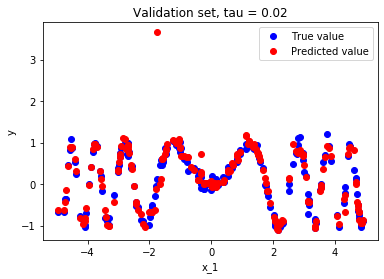

MSE for Validation set:  0.08468922744021402


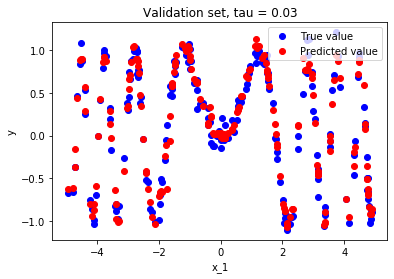

MSE for Validation set:  0.01809616312361801


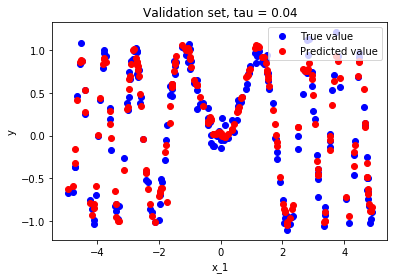

MSE for Validation set:  0.016559376232225937


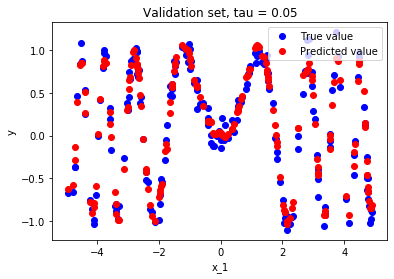

MSE for Validation set:  0.01240007615045891


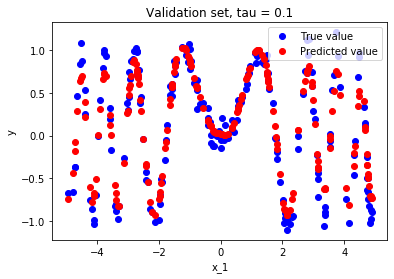

MSE for Validation set:  0.024224589379804953


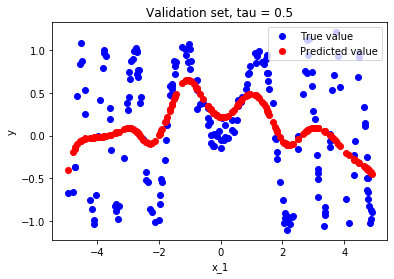

MSE for Validation set:  0.3305312682137523


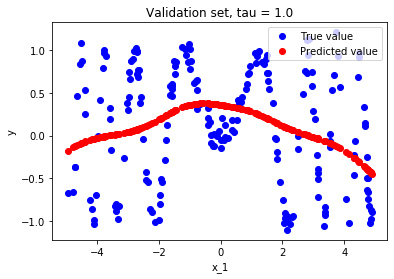

MSE for Validation set:  0.40009594801808596


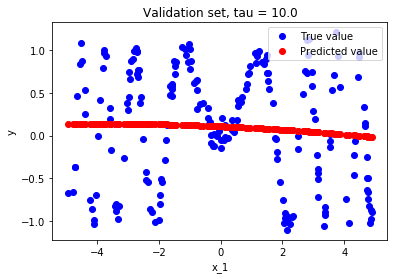

MSE for Validation set:  0.4337439227232362


In [64]:
tau_list = [2e-2, 3e-2, 4e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]
best_tau = main(tau_list)

Best tau:  0.05


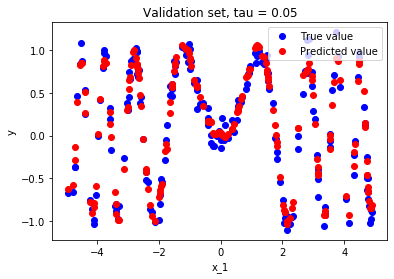

MSE for Validation set:  0.01240007615045891


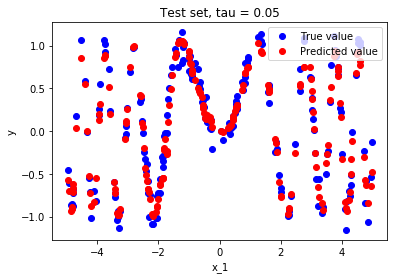

MSE for Test set:  0.016990143386867624


In [67]:
    print('Best tau: ', best_tau)        
    clf = LocallyWeightedLinearRegression(tau = best_tau)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_test_pred = clf.predict(x_test)
    plot(x_valid[:, -1], y_valid, y_pred, tau = best_tau, Type = "Validation")
    plot(x_test[:, -1], y_test, y_test_pred, tau = best_tau, Type = "Test")